# Iris Dataset : Simple Exploratory Data Analysis (EDA)

Import Modules

In [1]:
import pandas as pd # olah dan analisis data

Load dataset

In [2]:
iris_df = pd.read_csv('Iris.csv') # memuat file csv sebagat data frame
iris_df.head() # tampilkan 5 baris pertama

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Drop column "id"

In [3]:
# penghapusan kolom bernama
# iris_df = iris_df.drop(columns = 'id')
#iris_df.drop(columns='id', inplace=True (melakukan modifikasi data frame yg sama tanpa menghasilkan data frame lain)) 

Identify the shape of the dataset

In [4]:
iris_df.shape # bentuk/dimensi dataset (baris,kolom)

(150, 5)

Get the list of columns

In [5]:
iris_df.columns # daftar nama kolom

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

Identify data types for each column

In [6]:
iris_df.dtypes #tipe data untuk tiap kolom

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

Get bassic dataset information

In [7]:
iris_df.info() #informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Identify missing values

In [8]:
#iris_df.isnull().values.any() 
iris_df.isna().values.any() #mendeteksi keberadaan nilai kosong # isna dan isnull sama saja

False

Identify duplicate entries/rows

In [9]:
#iris_df[iris_df.duplicated(keep=False)] #tampilkan seluruh baris dengan duplikasi
iris_df[iris_df.duplicated()] #tampilkan hanya baris duplikasi sekunder

,sepal.length,sepal.width,petal.length,petal.width,variety
142,5.8,2.7,5.1,1.9,Virginica


In [10]:
iris_df.duplicated().value_counts() #hitung jumlah duplikasi data

False    149
True       1
dtype: int64

Drop duplicate entries/rows

In [11]:
iris_df.drop_duplicates(inplace=True) #menghapus duplikasi data
iris_df.shape #untuk melihat kembali dimensi datanya

(149, 5)

Describe the dataset

In [12]:
iris_df.describe() #deskripsi data

,sepal.length,sepal.width,petal.length,petal.width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Correlation Matrix

In [13]:
iris_df.corr() # korelasi antar kolom

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.118129,0.873738,0.820620
sepal.width,-0.118129,1.000000,-0.426028,-0.362894
petal.length,0.873738,-0.426028,1.000000,0.962772
petal.width,0.820620,-0.362894,0.962772,1.000000


# Iris Dataset: Data Visualisation

Import Modules

In [14]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data #%matplotlib inline untuk mengalihkan output visualisasi ke notebook yg sama

#output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline 

Heatmap

<AxesSubplot:>

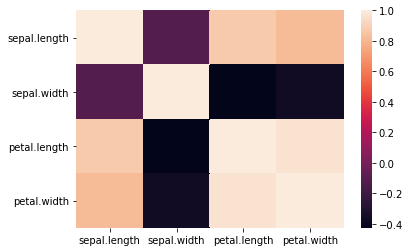

In [15]:
sns.heatmap(data=iris_df.corr())

Bar Plot

In [16]:
iris_df['variety'].value_counts() # menghitung jumlah setiap species

Versicolor    50
Setosa        50
Virginica     49
Name: variety, dtype: int64

Matplotlib

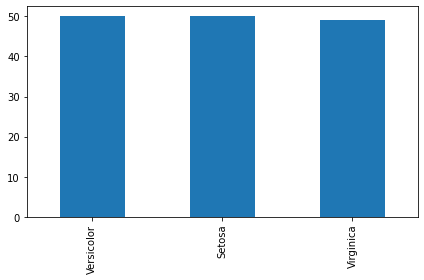

In [17]:
iris_df['variety'].value_counts().plot.bar() #visualisasi dengan bar plot
plt.tight_layout() #untuk memastikan visualisasinya optimal dgn memanfaatkan layar yg ada
plt.show()

Seaborn

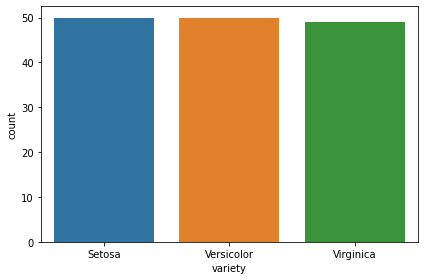

In [18]:
sns.countplot(data=iris_df, x='variety')
plt.tight_layout()
# sns.countplot?

Pie Chart

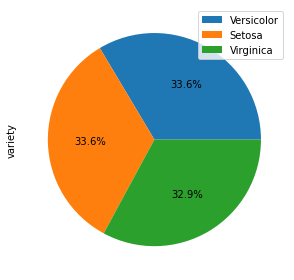

In [19]:
iris_df['variety'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True) #legend itu keterangan macam varietynya
plt.tight_layout()

Line Plot

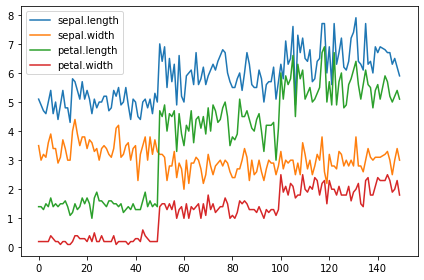

In [20]:
iris_df.plot()
plt.tight_layout()

Histogram

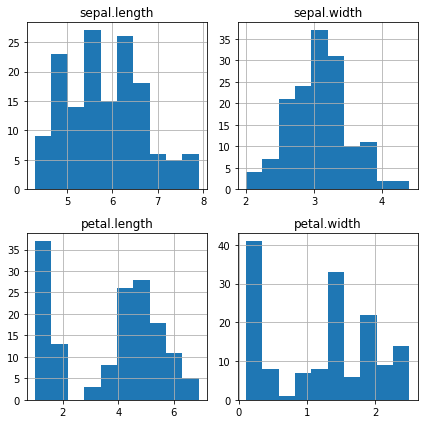

In [21]:
iris_df.hist(figsize=(6,6), bins=10) #bins itu adalah penggalan data atau jarak data histrogramnya, semakin kecil angka 
                                    #semakin besar jaraknya
plt.tight_layout()

Boxplot

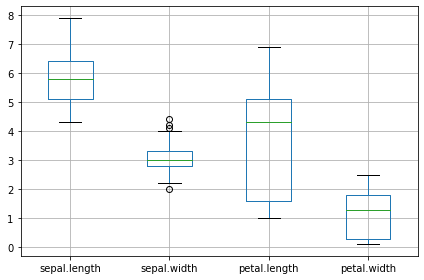

In [22]:
iris_df.boxplot()
plt.tight_layout()

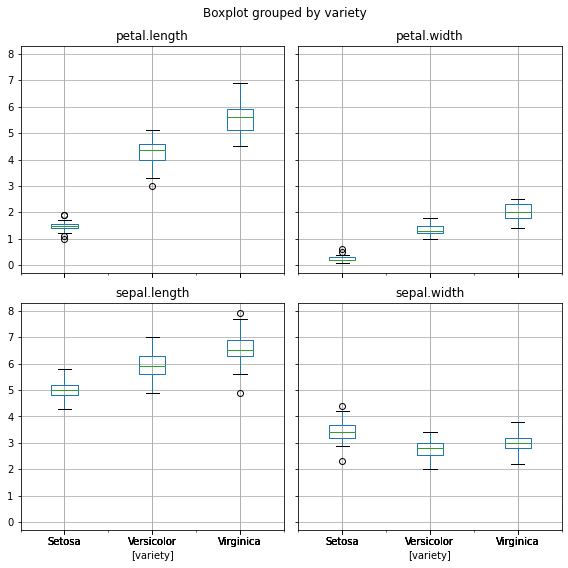

In [23]:
iris_df.boxplot(by='variety',figsize=(8,8))
plt.tight_layout()

Scatter Plot

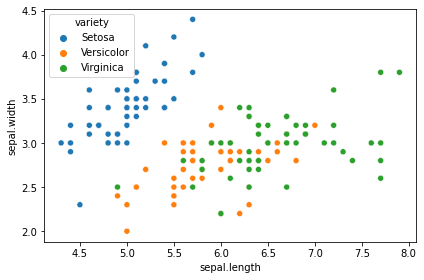

In [24]:
sns.scatterplot(x='sepal.length', y='sepal.width', data=iris_df, hue='variety')
#hue adalah pengkategoriannya, agar datanya bisa terlihat lebih detail
plt.tight_layout()

Pair Plot

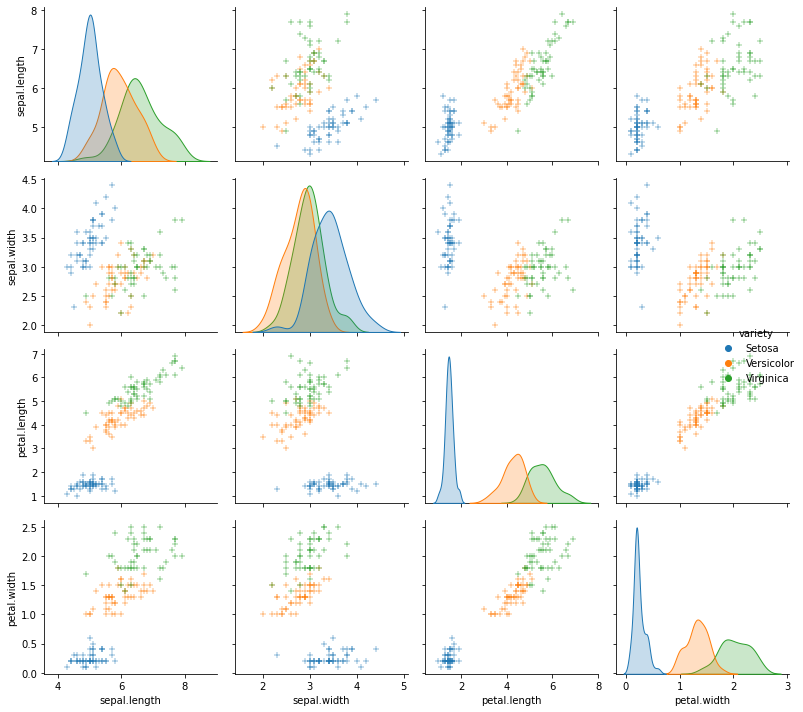

In [25]:
sns.pairplot(iris_df, hue='variety', markers='+')
plt.tight_layout()

Violin Plot

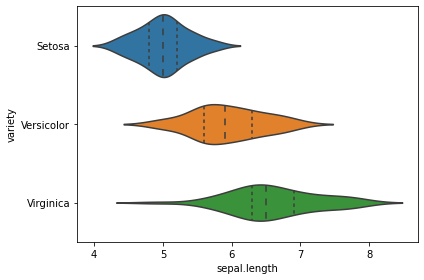

In [26]:
sns.violinplot(data=iris_df, y='variety', x='sepal.length', inner='quartile')
#inner merepresentasikan garis pada gambarnya, quartile adalah merepresentasikan Q dlm setiap fields
plt.tight_layout()

# Iris Dataset: Classification Models

Import Modules

In [27]:
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing data set secara random
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report # evaluasi performa model

Dataset: Features & Class Label

In [28]:
x=iris_df.drop(columns='variety') # menempatkan features ke dalam variabel x
x.head() # tampilkan 5 baris pertama # kalo tail() untuk menampilkan data atau baris terakhir

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
y=iris_df['variety'] # menampilkan class label (target) ke dalam variabel y
y.head() # tampilkan 5 baris pertama

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

Split the dataset into a training set and a testing set 

In [30]:
# membagi dataset ke dalam training dan testing set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=10)
#test_size = ukuran data set (0.4 artinya testing datasetnya 40%, trainingnya 60%)
#random state untuk proses replikasi atau pengulangan walaupun random dataset

print("training dataset")
print(x_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(x_test.shape)
print(y_test.shape)

training dataset
(89, 4)
(89,)

testing dataset:
(60, 4)
(60,)


K Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(x_train,y_train) # training model/classifier
    y_pred = model_knn.predict(x_test) # melakukan prediksi
    scores.append(accuracy_score(y_test,y_pred)) # evaluasi performa

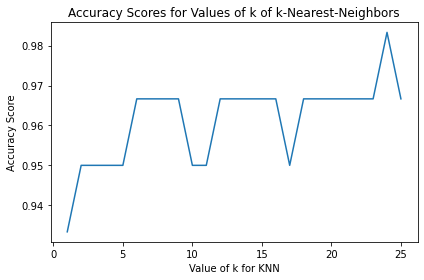

In [33]:
plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [34]:
model_knn = KNeighborsClassifier(n_neighbors=3) # Konfigurasi algoritma
model_knn.fit(x_train,y_train) # training model/classifier
y_pred=model_knn.predict(x_test) # melakukan prediksi

Accuracy Score

In [35]:
print(accuracy_score(y_test,y_pred)) # evaluasi akurasi

0.95


Confusion Matrix

In [37]:
print(confusion_matrix(y_test,y_pred)) # evaluasi confusion matrix

[[19  0  0]
 [ 0 19  3]
 [ 0  0 19]]


Classification Report

In [38]:
print(classification_report(y_test,y_pred)) # evaluasi klasifikasi

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      0.86      0.93        22
   Virginica       0.86      1.00      0.93        19

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(x_train,y_train)
y_pred=model_logreg.predict(x_test)

Accuracy Score

In [42]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


Confusion Matrix

In [43]:
print(confusion_matrix(y_test,y_pred))

[[19  0  0]
 [ 0 20  2]
 [ 0  0 19]]


Classification Report

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      0.91      0.95        22
   Virginica       0.90      1.00      0.95        19

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



#  Support Vector Classifier

In [45]:
from sklearn.svm import SVC

In [47]:
# model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(x_train,y_train)
y_pred=model_svc.predict(x_test)

Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_pred=model_dt.predict(x_test)

Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# model_rf = RandomForestClassifier()
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train)
pred_rf=model_rf.predict(x_test)

Accuracy Comparision for Various Models

In [52]:
models=[model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    pred = model.predict(x_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]


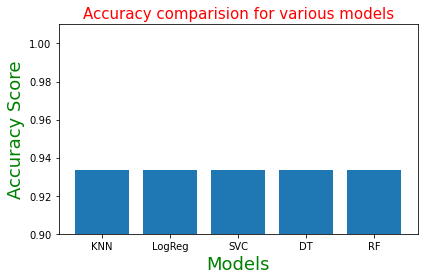

In [54]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'], accuracy_scores)
plt.ylim(0.90,1.01)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()